# <span style="color:orange">EDA</span>. (Exploratory Data Analysis)

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boat = sns.load_dataset("titanic")

In [3]:
boat.to_csv("titanic.csv")

---

> ## 01_Undestand the Data !

In [4]:
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
boat.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
boat.shape

(891, 15)

In [7]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
boat.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
boat.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
boat.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
boat['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [12]:
boat['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [13]:
boat['alone'].append(boat['alive']).unique()

array([False, True, 'no', 'yes'], dtype=object)

---

---

> ## 02_Cleaning & Filtering the Data !

### <span style="color:blue">- Find missing values</span>

In [14]:
boat.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### <span style="color:blue">-- Remove missing values</span>

In [15]:
# Remove duck columns !
boat_new = boat.drop(['deck'], axis=1)
boat_new.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [16]:
boat_new.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [17]:
boat_new.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

### <span style="color:cyan">-- Remove missing values</span>

In [18]:
boat_new.shape

(891, 14)

In [19]:
891-177-2-2

710

In [20]:
boat_new1 = boat_new.dropna()
boat_new1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [21]:
boat_new1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [22]:
boat_new1.shape

(712, 14)

In [23]:
boat_new1['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

In [24]:
boat_new1['alive'].value_counts()

no     424
yes    288
Name: alive, dtype: int64

---

### <span style="color:green">-- Remove Outliers</span>

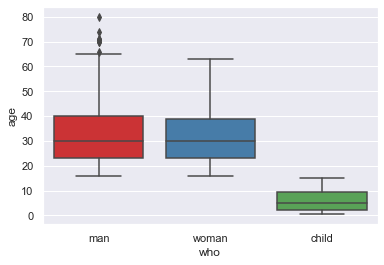

In [25]:
# box-plot !

sns.set_theme(style="darkgrid", color_codes=True)
sns.boxplot(data=boat_new1,
            x="who",
            y="age",
            palette="Set1")
plt.show()            

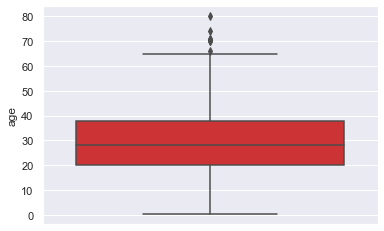

In [26]:
# box-plot !

sns.set_theme(style="darkgrid", color_codes=True)
sns.boxplot(data=boat_new1,
            y="age",
            palette="Set1")
plt.show()            

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


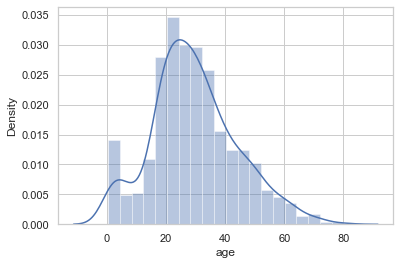

In [27]:
# dist-plot !

sns.set_theme(style="whitegrid", color_codes=True)
sns.distplot(boat_new1['age'])
plt.show()            

In [28]:
boat_new1.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 712, dtype: float64

In [29]:
boat_new1['age'].mean()

29.64209269662921

In [30]:
boat_new1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [31]:
boat_new1 = boat_new1[boat_new1['age']<=60]
boat_new1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


In [32]:
boat_new1.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 691, dtype: float64

---

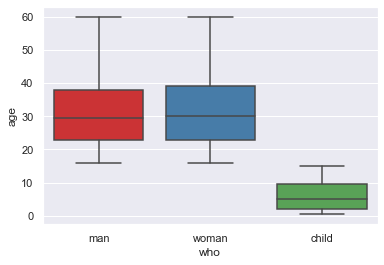

In [33]:
# box-plot !

sns.set_theme(style="darkgrid", color_codes=True)
sns.boxplot(data=boat_new1,
            x="who",
            y="age",
            palette="Set1")
plt.show()            

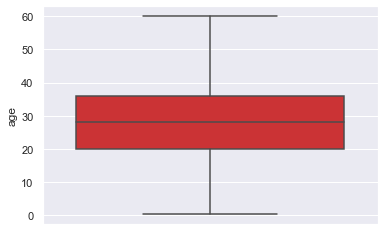

In [34]:
# box-plot ! of men

sns.set_theme(style="darkgrid", color_codes=True)
sns.boxplot(data=boat_new1,
            y="age",
            palette="Set1")
plt.show()            

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


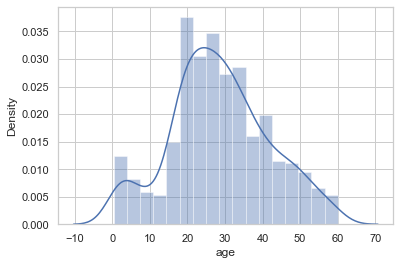

In [35]:
# dist-plot !

sns.set_theme(style="whitegrid", color_codes=True)
sns.distplot(boat_new1['age'])
plt.show()            

---

<AxesSubplot:>

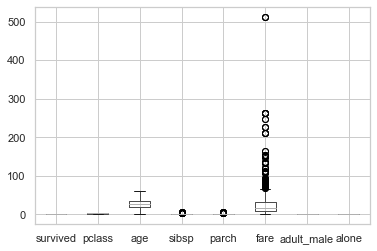

In [36]:
# box-plot !

boat_new1.boxplot()

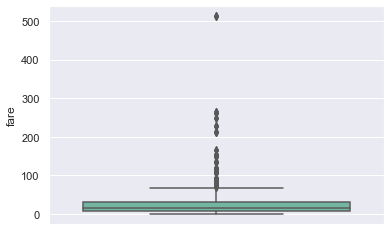

In [37]:
# box-plot ! of men

sns.set_theme(style="darkgrid", color_codes=True)
sns.boxplot(data=boat_new1,
            y="fare",
            palette="Set2")
plt.show()            

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


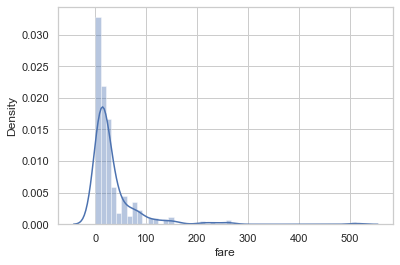

In [38]:
# dist-plot !

sns.set_theme(style="whitegrid", color_codes=True)
sns.distplot(boat_new1['fare'])
plt.show()            

In [39]:
boat_new1['fare'].max()

512.3292

In [40]:
boat_new1 = boat_new1[boat_new1['fare']<=150]
boat_new1.fare.max()

146.5208

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


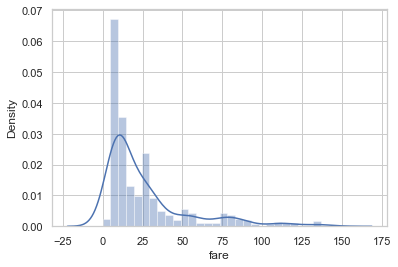

In [41]:
# dist-plot !

sns.set_theme(style="whitegrid", color_codes=True)
sns.distplot(boat_new1['fare'])
plt.show()            

In [42]:
# log transformation !

boat_new1['log_fare'] = np.log(boat_new1[['fare']])
boat_new1.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,log_fare
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662


***

---

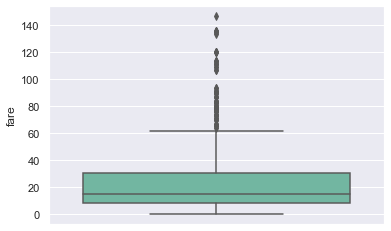

In [43]:
# box-plot ! of men

sns.set_theme(style="darkgrid", color_codes=True)
sns.boxplot(data=boat_new1,
            y="fare",
            palette="Set2")
plt.show()            

<AxesSubplot:>

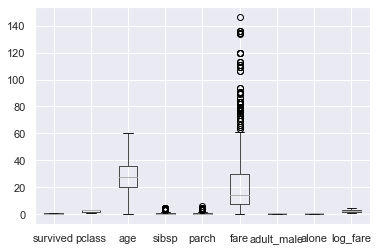

In [44]:
# box-plot !

boat_new1.boxplot()

In [45]:
boat.shape

(891, 15)

In [46]:
boat_new1.shape

(665, 15)

---

***

In [47]:
# (Lock transformation) for Normalize our data !

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

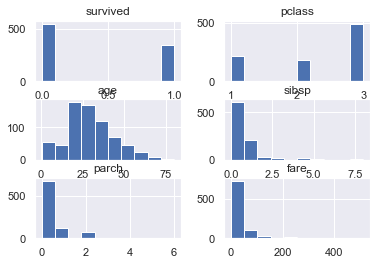

In [48]:
boat.hist()

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

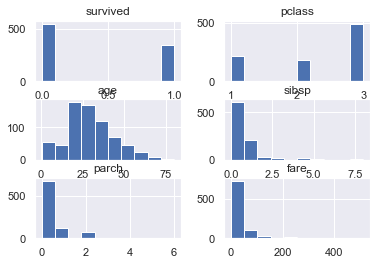

In [49]:
boat_new.hist()

array([[<AxesSubplot:title={'center':'fare'}>]], dtype=object)

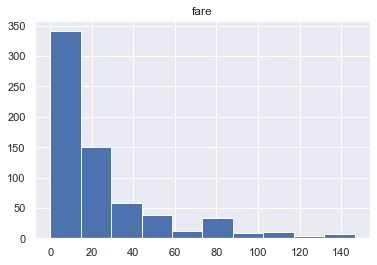

In [50]:
boat_new1.hist(['fare'])

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

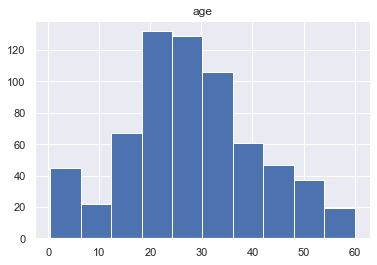

In [51]:
boat_new1.hist(['age'])

<AxesSubplot:>

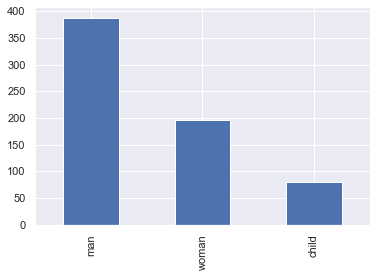

In [52]:
pd.value_counts(boat_new1['who']).plot.bar()

<AxesSubplot:>

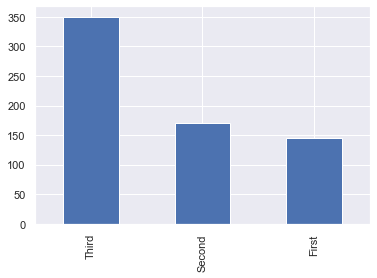

In [53]:
pd.value_counts(boat_new1['class']).plot.bar()

<AxesSubplot:xlabel='sex,class'>

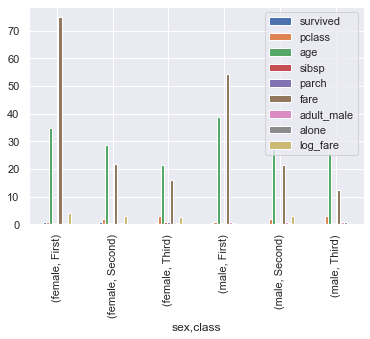

In [54]:
boat_new1.groupby(['sex', 'class']).mean().plot.bar()

In [55]:
boat.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

In [56]:
boat_new1.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch       fare  \
sex    class                                                                
female First   0.984127     1.0  34.920635  0.492063  0.365079  74.904432   
       Second  0.918919     2.0  28.722973  0.500000  0.621622  21.951070   
       Third   0.455446     3.0  21.341584  0.831683  0.960396  15.937625   
male   First   0.439024     1.0  38.945122  0.390244  0.231707  54.294156   
       Second  0.145833     2.0  29.638854  0.385417  0.250000  21.444792   
       Third   0.152610     3.0  25.847068  0.497992  0.261044  12.239556   

               adult_male     alone  log_fare  
sex    class                                   
female First      0.00000  0.380952  4.221755  
       Second     0.00000  0.405405  2.985791  
       Third      0.00000  0.366337  2.621204  
male   First      0.97561  0.536585       NaN  
       Second     0.90625  0.625000  2.906213  
       Third      0.88755  0.734940       NaN

In [57]:
boat_new1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
log_fare       0
dtype: int64

---

---

> ## 03_Relationship between Data !

In [58]:
boat_corr = boat.corr()
boat_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

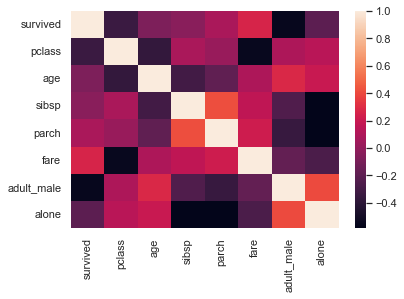

In [59]:
sns.heatmap(boat_corr)

<AxesSubplot:>

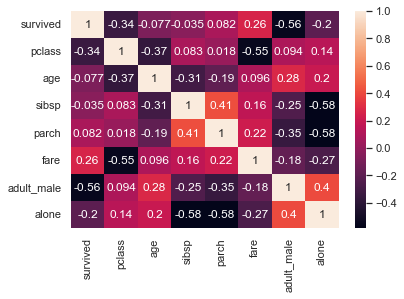

In [60]:
sns.heatmap(boat_corr, annot=True)

---

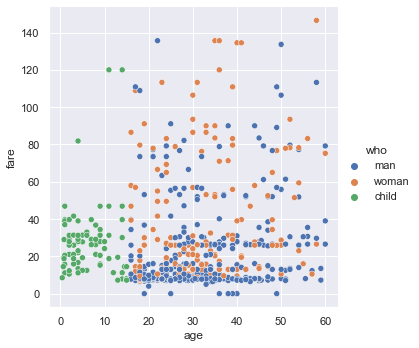

In [61]:
sns.relplot(x='age',
            y='fare',
            hue='who',
            data=boat_new1)

---

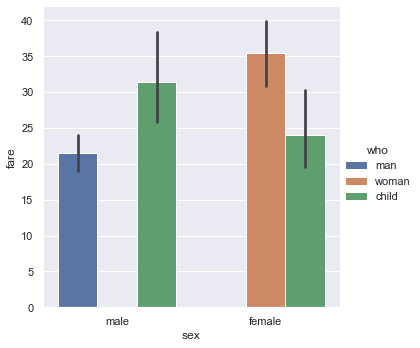

In [62]:
sns.catplot(x='sex',
            y='fare',
            hue='who',
            data=boat_new1,
            kind='bar')

---

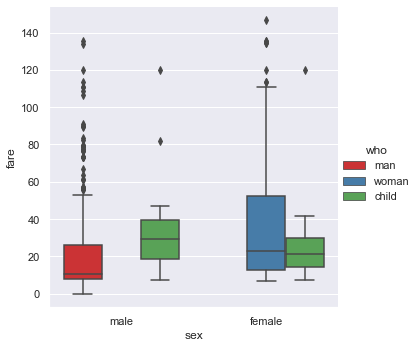

In [63]:
sns.catplot(x='sex',
            y='fare',
            hue='who',
            data=boat_new1,
            kind='box',
            palette="Set1")

**After taking log(fare)**

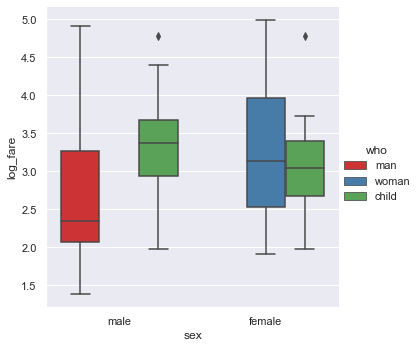

In [64]:
sns.catplot(x='sex',
            y='log_fare',
            hue='who',
            data=boat_new1,
            kind='box',
            palette="Set1")

***

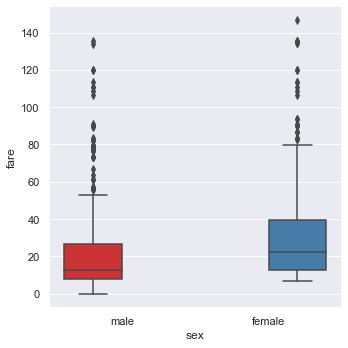

In [65]:
sns.catplot(x='sex',
            y='fare',
            hue='sex',
            data=boat_new1,
            kind='box',
            palette="Set1")

**After taking log(fare)**

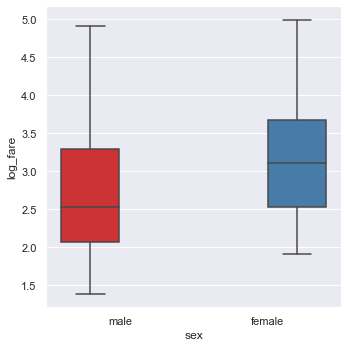

In [66]:
sns.catplot(x='sex',
            y='log_fare',
            hue='sex',
            data=boat_new1,
            kind='box',
            palette="Set1")

***

***

***